In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# Vehicle data
path = './data/vehicles_train.csv'
train = pd.read_csv(path)

In [4]:
train['prediction'] = train.price.mean()

In [5]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [6]:
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

5936.981985995983

In [13]:
train[train['miles'] < 100_000].price.mean()

12083.333333333334

In [14]:
train[train['miles'] > 100_000].price.mean()

2437.5

In [15]:
train['prediction'] = np.where(train['miles'] < 100_000, train[train['miles'] < 100_000].price.mean(), train[train['miles'] > 100_000].price.mean())

In [16]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,12083.333333
1,14000,2010,30000,2,car,12083.333333
2,13000,2010,73500,4,car,12083.333333
3,9500,2009,78000,4,car,12083.333333
4,9000,2007,47000,4,car,12083.333333
5,4000,2006,124000,2,car,2437.500000
6,3000,2004,177000,4,car,2437.500000
7,2000,2004,209000,4,truck,2437.500000
8,3000,2003,138000,2,car,2437.500000
9,1900,2003,160000,4,car,2437.500000


In [17]:
np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

3530.146530076269

In [18]:
def mileage_split(miles):
    lower_mileage_price = train[train['miles'] < miles].price.mean()
    higher_milage_price = train[train['miles'] > miles].price.mean()
    train['prediction'] = np.where(train['miles']< miles,lower_mileage_price,higher_milage_price) 
    
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [22]:
mileage_split(30_000)

4173.194885882464

In [31]:
def feature_split(feature_name, value):
    lower_feature_split = train[train[feature_name] <= value].price.mean()
    higher_feature_split = train[train[feature_name] > value].price.mean()
    
    train['prediction'] = np.where(train[feature_name] < value, lower_feature_split, higher_feature_split)
    
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [35]:
train.miles.min()

13000

In [34]:
train.miles.max()

209000

In [41]:
milage_range = list(range(train.miles.min(),train.miles.max(), 1000))

In [46]:
milage_range

[13000,
 14000,
 15000,
 16000,
 17000,
 18000,
 19000,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000,
 36000,
 37000,
 38000,
 39000,
 40000,
 41000,
 42000,
 43000,
 44000,
 45000,
 46000,
 47000,
 48000,
 49000,
 50000,
 51000,
 52000,
 53000,
 54000,
 55000,
 56000,
 57000,
 58000,
 59000,
 60000,
 61000,
 62000,
 63000,
 64000,
 65000,
 66000,
 67000,
 68000,
 69000,
 70000,
 71000,
 72000,
 73000,
 74000,
 75000,
 76000,
 77000,
 78000,
 79000,
 80000,
 81000,
 82000,
 83000,
 84000,
 85000,
 86000,
 87000,
 88000,
 89000,
 90000,
 91000,
 92000,
 93000,
 94000,
 95000,
 96000,
 97000,
 98000,
 99000,
 100000,
 101000,
 102000,
 103000,
 104000,
 105000,
 106000,
 107000,
 108000,
 109000,
 110000,
 111000,
 112000,
 113000,
 114000,
 115000,
 116000,
 117000,
 118000,
 119000,
 120000,
 121000,
 122000,
 123000,
 124000,
 125000,
 126000,
 127000,
 128000,
 129000,
 130000,
 131000,
 132000,
 133000

In [42]:
for range_ in milage_range:
    
    print(mileage_split(range_))

6054.443049730875
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4115.449316529493
4173.194885882464
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3671.3822491055894
3689.4533627222454
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.0917425414564
3984.613263184127
4603.104542433446
4603.104542433446
4603.104542433446
4603.1045424334

In [43]:
RMSE = [mileage_split(mile) for mile in milage_range]

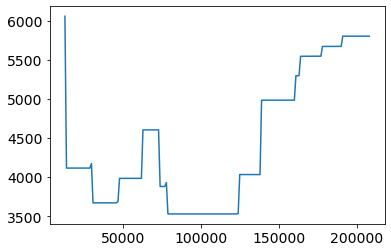

In [47]:
plt.plot(milage_range, RMSE )

In [49]:
# Encode car as 0 and truck as 1.
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [51]:
feature_cols = ['year', 'miles', 'doors', 'vtype']

In [52]:
feature_cols

['year', 'miles', 'doors', 'vtype']

In [54]:
X = train[feature_cols]
y = train.price

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
treereg = DecisionTreeRegressor(random_state=1)

In [58]:
treereg

DecisionTreeRegressor(random_state=1)

In [59]:
from sklearn.model_selection import cross_val_score

In [78]:
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')

In [73]:
np.mean(np.sqrt(-scores))

3107.1428571428573

In [86]:
# Try different values one by one.
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3345.238095238095

In [87]:
max_depth_range = list(range(1, 8))

In [88]:
max_depth_range

[1, 2, 3, 4, 5, 6, 7]

In [89]:
RMSE_scores = []

In [91]:
# for every value in the max depth range list
for depth in max_depth_range:

    # Create a tree regressor with max_depth equal to the value of the list  
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    
    
    # append the errors list with that value
    scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    
    RMSE_scores.append(np.mean(np.sqrt(-scores)))


In [93]:
RMSE_scores

[4050.1443001443,
 3345.238095238095,
 3002.3809523809527,
 3125.0,
 3107.1428571428573,
 3107.1428571428573,
 3107.1428571428573]

In [97]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [98]:
treereg.feature_importances_

array([0.79874419, 0.20125581, 0.        , 0.        ])

In [99]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


In [100]:
# Read the testing data.
path = './data/vehicles_test.csv'

test = pd.read_csv(path)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [102]:
X_test = test[feature_cols]

In [110]:
y_test = test.price

In [106]:
X_test

,year,miles,doors,vtype
0,2003,130000,4,1
1,2005,82500,4,0
2,2010,60000,2,0


In [105]:
y_test

0     3000
1     6000
2    12000
Name: price, dtype: int64

In [114]:
y_pred

array([ 4000.,  5000., 13500.])

In [101]:
treereg

DecisionTreeRegressor(max_depth=3, random_state=1)

In [111]:
y_pred = treereg.predict(X_test)

In [112]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

In [115]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,6923.076923
1,14000,2010,30000,2,0,6923.076923
2,13000,2010,73500,4,0,6923.076923
3,9500,2009,78000,4,0,6923.076923
4,9000,2007,47000,4,0,6923.076923
5,4000,2006,124000,2,0,6923.076923
6,3000,2004,177000,4,0,6923.076923
7,2000,2004,209000,4,1,2000.000000
8,3000,2003,138000,2,0,6923.076923
9,1900,2003,160000,4,0,6923.076923


In [121]:
split_2 = train[train['year']<2006.5]

In [123]:
split_2 = split_2[split_2['miles']<=131_000]

In [124]:
split_2

,price,year,miles,doors,vtype,prediction
5,4000,2006,124000,2,0,6923.076923
11,5000,2001,62000,4,0,6923.076923
